In [1]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [4]:
expr_res_data_path = '20230721_15_29_37_headup_detect_delay_test_new_0.3_0.8_tx2-cloud-raw.csv'

df = pd.read_csv(expr_res_data_path)
df = df[1:]
max_fps = 30
df.loc[df['fps'] >= 30, 'fps'] = max_fps
resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
df['resolution'] = df['resolution'].replace(resolution_map)

df

,n_loop,frame_id,total,up,fps,resolution,delay,face_detection,face_alignment
1,2,2.0,7,6,30,1,0.241876,host,host
2,3,3.0,7,5,30,1,0.234490,host,host
3,4,4.0,7,6,20,1,0.237226,host,host
4,5,5.0,7,5,20,1,0.241509,host,host
5,6,6.0,7,6,20,1,0.233601,host,host
...,...,...,...,...,...,...,...,...,...
486,487,828.0,18,16,20,1,0.129691,host,cloud
487,488,829.0,17,15,20,1,0.188102,host,cloud
488,489,831.0,18,15,20,1,0.135881,host,cloud
489,490,832.0,18,14,20,1,0.201598,host,cloud


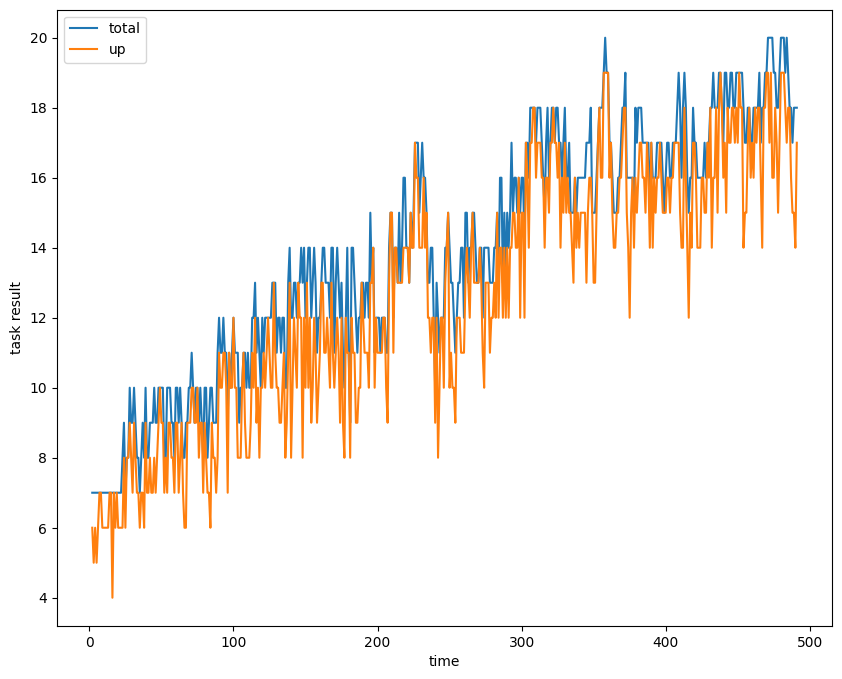

In [7]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.plot(df['n_loop'], df['total'], label='total')
ax.plot(df['n_loop'], df['up'], label='up')
# ax.title.set_text('total/up vs time')
plt.xlabel('time')
plt.ylabel('task result')
ax.legend()

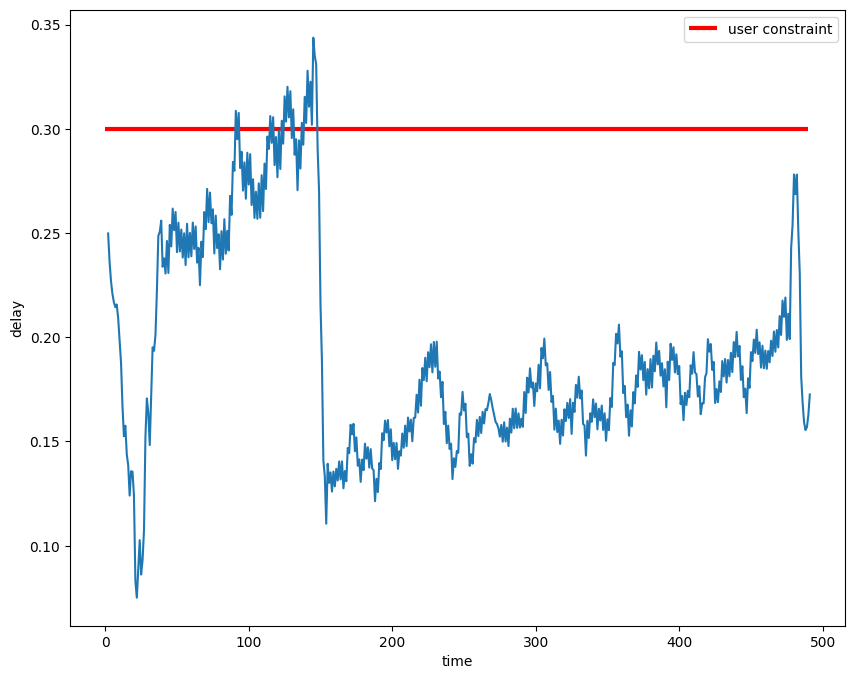

In [10]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.hlines(y=0.3, xmin=0, xmax=len(df['n_loop']), linewidth=3, color='r', label='user constraint')
ax.plot(df['n_loop'], scipy.signal.savgol_filter(df['delay'], 11, 3))
# ax.plot(df['n_loop'], df['delay'])
# ax.title.set_text('delay vs time')
plt.xlabel('time')
plt.ylabel('delay')
ax.legend()

Text(0, 0.5, 'frame rate')

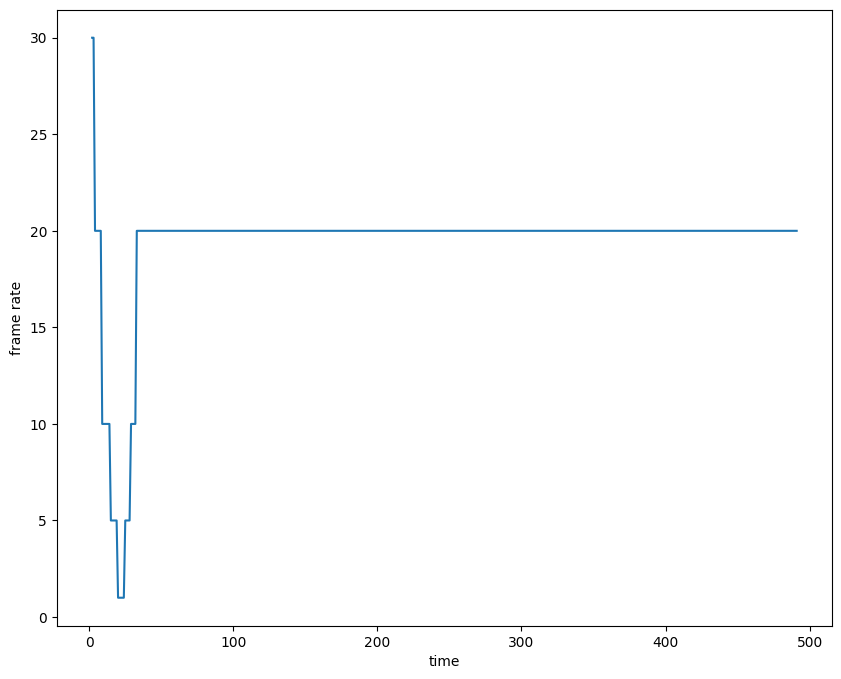

In [11]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.plot(df['n_loop'], df['fps'])
# ax.title.set_text('frame rate vs time')
plt.xlabel('time')
plt.ylabel('frame rate')

Text(0, 0.5, 'time')

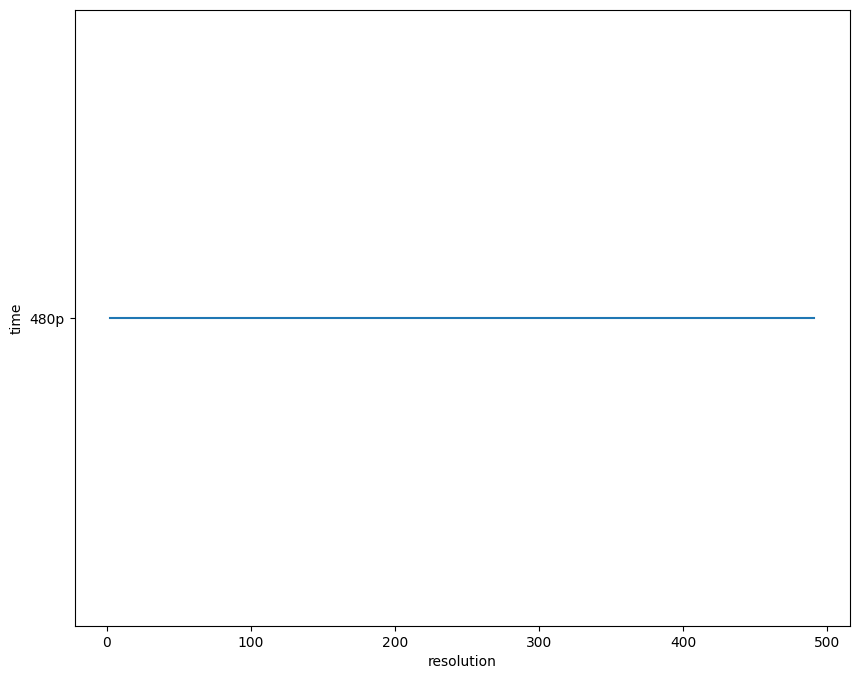

In [12]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.set_yticks(np.arange(4))
ax.set_yticklabels(resolution_map.keys())
ax.plot(df['n_loop'], df['resolution'])
# ax.title.set_text('resolution vs time')
plt.xlabel('resolution')
plt.ylabel('time')

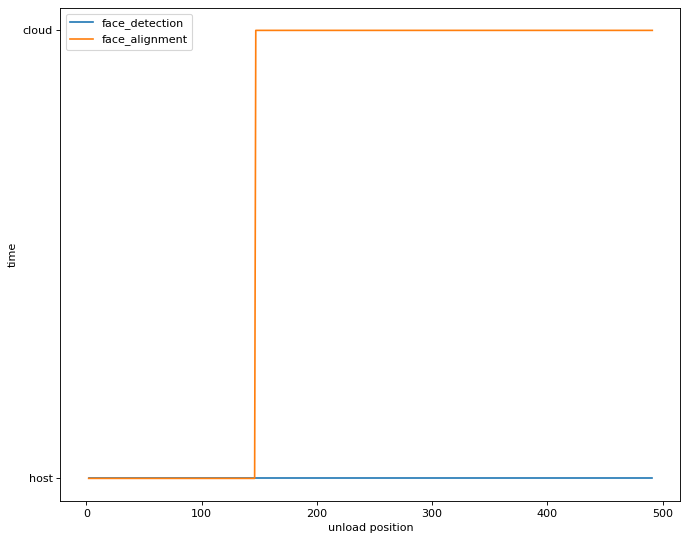

In [14]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.plot(df['n_loop'], df['face_detection'], label='face_detection')
ax.plot(df['n_loop'], df['face_alignment'], label='face_alignment')
# ax.title.set_text('unload position vs time')
plt.xlabel('unload position')
plt.ylabel('time')
ax.legend()